In [1]:
%cd desktop/nand

C:\Users\jose\desktop\nand


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("results.csv")

In [4]:
df.head()

,location,year,avg_temp
0,Columbus,1743,7.46
1,Columbus,1744,15.73
2,Columbus,1745,6.91
3,Columbus,1746,NaN
4,Columbus,1747,NaN


In [5]:
df = df.sort_values(by = ["location", "year"])

In [6]:
df.head()

,location,year,avg_temp
0,Columbus,1743,7.46
1,Columbus,1744,15.73
2,Columbus,1745,6.91
3,Columbus,1746,NaN
4,Columbus,1747,NaN


In [7]:
test = pd.concat([df.loc[df.location == location, ["avg_temp"]].rolling(5).mean() for location in df.location.unique()]).rename(columns = {"avg_temp" : "5yr_rolling"})

In [8]:
test

,5yr_rolling
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
859,9.578
864,9.534
866,9.570
869,9.582


In [9]:
df = pd.merge(df, test, left_index = True, right_index = True)

In [10]:
%matplotlib inline

In [11]:
pivot = df.pivot(index = "year", columns = "location", values = "5yr_rolling")

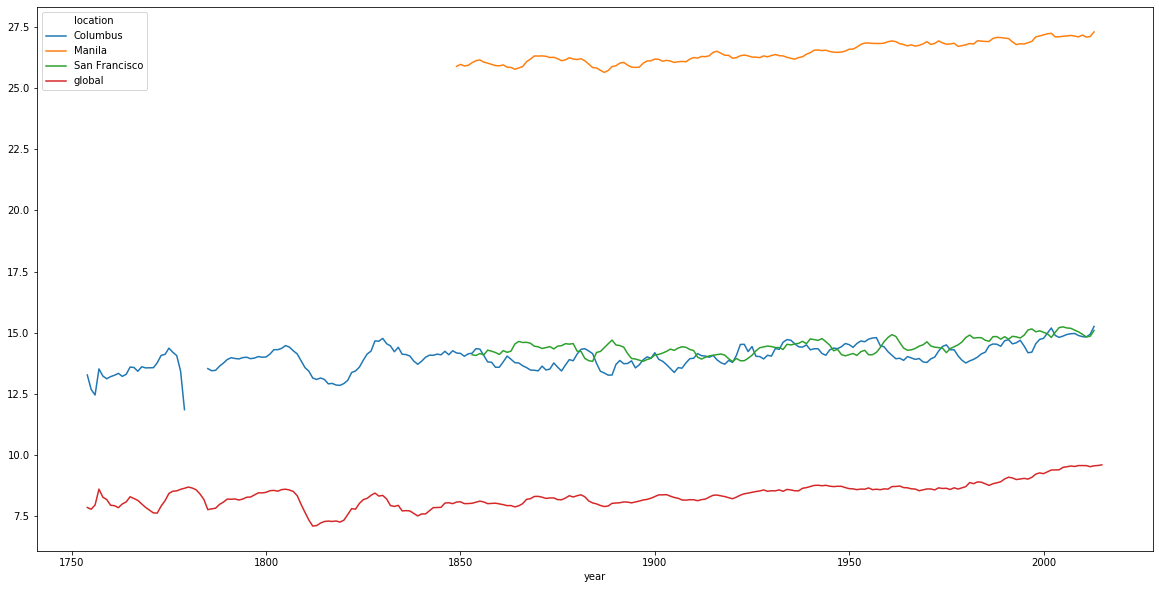

In [12]:
pivot.plot(figsize = (20, 10))

In [13]:
def get_moving_avg(s, period):
    return s.rolling(period).mean()

In [14]:
df.head()

,location,year,avg_temp,5yr_rolling
0,Columbus,1743,7.46,NaN
1,Columbus,1744,15.73,NaN
2,Columbus,1745,6.91,NaN
3,Columbus,1746,NaN,NaN
4,Columbus,1747,NaN,NaN


In [15]:
df[df.location == "San Francisco"].corr()

,year,avg_temp,5yr_rolling
year,1.000000,0.467342,0.633831
avg_temp,0.467342,1.000000,0.689104
5yr_rolling,0.633831,0.689104,1.000000


In [16]:
df[df.location == "Manila"].corr()

,year,avg_temp,5yr_rolling
year,1.000000,0.830768,0.925269
avg_temp,0.830768,1.000000,0.887154
5yr_rolling,0.925269,0.887154,1.000000


In [17]:
df[df.location == "Columbus"].corr()

,year,avg_temp,5yr_rolling
year,1.000000,0.392427,0.605367
avg_temp,0.392427,1.000000,0.688108
5yr_rolling,0.605367,0.688108,1.000000


In [18]:
df[df.location == "global"].corr()

,year,avg_temp,5yr_rolling
year,1.000000,0.622775,0.716849
avg_temp,0.622775,1.000000,0.855694
5yr_rolling,0.716849,0.855694,1.000000


In [19]:
df2 = pd.read_csv("results.csv", index_col = ["location", "year"])

In [20]:
df2.head(10)

avg_temp
location year          
Columbus 1743      7.46
         1744     15.73
         1745      6.91
         1746       NaN
         1747       NaN
         1748       NaN
         1749       NaN
global   1750      8.72
Columbus 1750     14.62
         1751     15.36

In [21]:
df = pd.read_csv("results.csv")

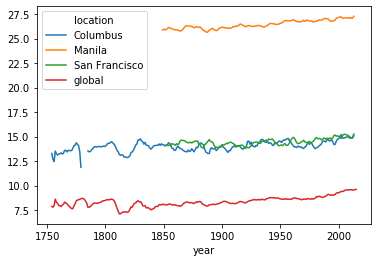

In [22]:
df.pivot(index = "year", columns = "location", values = "avg_temp").rolling(5).mean().plot()

In [25]:
pivot.columns

Index(['Columbus', 'Manila', 'San Francisco', 'global'], dtype='object', name='location')

In [29]:
pivot.tail()

location,Columbus,Manila,San Francisco,global
year,,,,
2011,14.830,27.076,14.836,9.578
2012,14.942,27.102,14.858,9.534
2013,15.260,27.288,15.094,9.570
2014,NaN,NaN,NaN,9.582
2015,NaN,NaN,NaN,9.608


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DA03DEF088>,
      dtype=object)

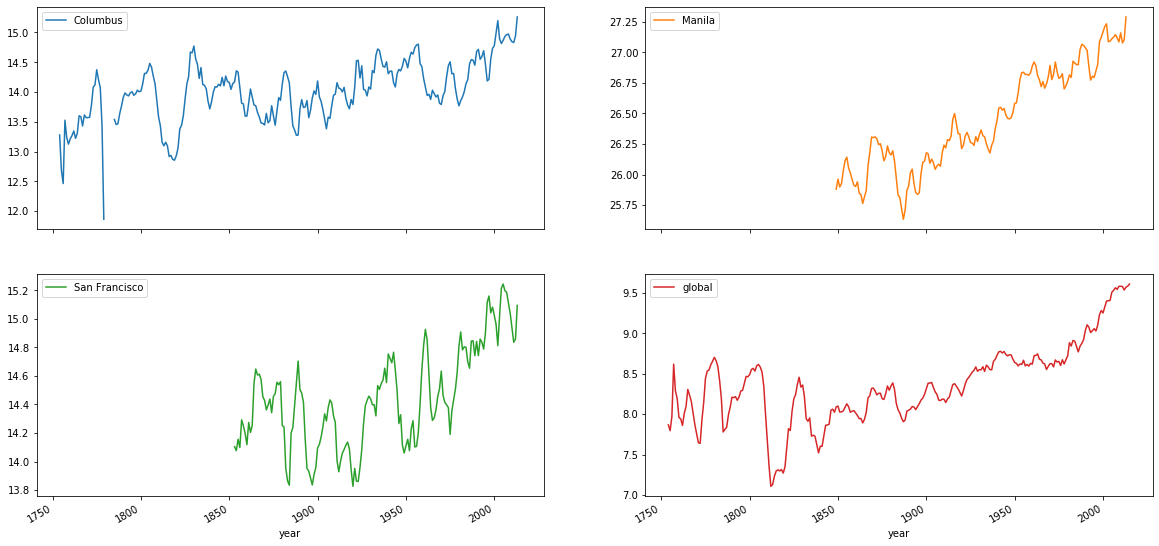

In [31]:
pivot.plot(subplots = True, layout = (2, 2), figsize = (20, 10))